การควบคุมเหมาะที่สุดและการเรียนรูู้เสริมกำลัง -- ดร.วโรดม ตู้จินดา

# 4 การโปรแกรมพลวัตแบบเชิงกำหนด

ในหัวข้อ 1.2.1 บทที่ 1 ได้กล่าวถึงการโปรแกรมพลวัต (dynamic programming ต่อไปจะเรียกย่อว่า DP) โดยสังเขป 
โดยเป็นวิธีการที่คิดค้นขึ้นตั้งแต่ยุคเริ่มต้นคอมพิวเตอร์เพื่อใช้เลือกการตัดสินใจ โดยมีการประยุกต์ใช้ในสาขาต่างๆ เช่นการวิจัยดำเนินการ (operation research มักเรียกโดยย่อว่า OR) ระบบควบคุม เศรษฐศาสตร์​ ฯลฯ แม้ว่าสมรรถนะของตัวประมวลผลสมัยนั้นยังไม่เพียงพอสำหรับการใช้งานในปัญหาทั่วไปที่มีข้อมูลจำนวนมากเหมือนในปัจจุบัน 
อย่างไรก็ตาม เบลแมน [1] ได้จัดรูปแบบปัญหาไว้เป็นอย่างดี 
ทำให้ถูกใช้เป็นเครื่องจักรสำคัญของ RL ตราบจนปัจจุบัน และมีการเชื่อมความสัมพันธ์กับปัญหาการควบคุมเหมาะที่สุด [2,3] 
โดยพบว่ามีหลักการที่สอดคล้องกันดังที่ได้อธิบายก่อนหน้านี้  

แม้ว่าวิธีการที่อยู่บนพื้นฐาน DP จะแตกแขนงออกไปอย่างมากมายตามรูปแบบของโจทย์ปัญหา ในหนังสือนี้จะเน้นวิธีพื้นฐานที่ประยุกต์ใช้ในสาขาระบบควบคุมเป็นหลัก
เนื้อหาในบทนี้ยังคงตามรอยรายวิชา [4] แต่เสริมด้วยเนื้อหาจาก [3,5] เพื่อให้เข้าใจความสัมพันธ์ระหว่าง DP, RL และการควบคุมเหมาะที่สุดได้ดีขึ้น

## 4.1 คำศัพท์และสัญกรณ์

**หมายเหตุ :** ในตัวเลือกด้านล่างนี้ นอกจากตัวย่อ DP, RL ที่นิยามแล้ว มีตัวย่อเพิ่มเติมคือ 

* OC (optimal control) เน้นสำหรับการควบคุมเหมาะที่สุด
* GP (general problem) ปัญหาทั่วไปที่ใช้เป็นตัวอย่างเสริม เช่นการเดินทางของพนักงานขาย 

ผู้เริ่มต้นที่ติดตามหนังสือและวีดีโอสอนเกี่ยวกับ DP อาจจะสับสนกับคำศัพท์และสัญกรณ์ที่ผู้นำเสนอใช้ที่มักจะแตกต่างกัน 
ได้รวบรวมที่นิยมใช้ดังนี้

#### ระบบเวลาต่อเนื่อง

**หมายเหตุ :** โดยธรรมชาติแล้วปัญหา DP อยู่ในรูปแบบที่เป็นระบบดีสครีต การขยายไปยังระบบเวลาต่อเนื่องส่วนใหญ่จะเกี่ยวข้องกับ OC มากกว่า RL 

* สถานะ : $x(t)$
* เอาต์พุตตัวควบคุม : $u(t)$
* โมเดลพลวัต : $\dot{x} = f(x(t),u(t))$ 
* มูลค่าแต่ละขั้นและขั้นสุดท้าย : $l(x(t),u(t)),\; l_N(x_f)$
* ฟังก์ชันมูลค่า : $J(x),\; V(x)$
* ฟังก์ชันมูลค่าเหมาะที่สุด : $J^*(x),\; V^*(x)$
* เอาต์พุตควบคุมเหมาะที่สุด : $$u^*(x), \pi^*(x)$

#### ระบบเวลาดีสครีต

* สถานะ (OC,RL) : $s[k],\; x[k],\; x_k$
* เอาต์พุตตัวควบคุม (OC): $u[k],\; u_k$
* ตัวกระทำ (RL): $a[k]$
* นโยบายเหมาะที่สุด (RL): $\pi[s_k]$
* โมเดลพลวัต (OC,RL) : $f(x[k],u[k]),\; f(x_k,u_k),\; f(s[k],a[k])$ หรือโมเดลมาร์คอฟ (RL) : $p(s,s',a)$
* มูลค่าแต่ละขั้นและขั้นสุดท้าย (OC,RL,GP) : $g_k(x_k,u_k),\; g_N(x_N),\; l_k(x_k,u_k),\;l_N(x_N)$
* ฟังก์ชันมูลค่า (OC,RL) : $J(x_k),\; J(s_k), V(x_k)$
* ฟังก์ชันมูลค่าเหมาะที่สุด : $J^*(x_k),\; J^*(s_k),\; V^*(x_k)$

**หมายเหตุ :** 

* ฟังก์ชันวัตถุประสงค์ใน OC ใช้ศัพท์ภาษาอังกฤษ "cost function" แต่ RL ใช้ "value function" 
ในหนังสือนี้เมื่อแปลเป็นภาษาไทยใช้คำว่า "มูลค่า" ทั้งหมด ซึ่งไม่สร้างปัญหาใดๆ หากแยกแยะได้ว่าวัตถุประสงค์ของ OC คือต้องการลดมูลค่า (เสมือนค่าใช้จ่าย) และ RL คือต้องการเพิ่มมูลค่า (เสมือนค่ารางวัล)  
* เหตุผลการเปลี่ยนสัญกรในบางหนังสือหรือเอกสารคือไม่ต้องการให้ซ้ำกับอักขระที่ใช้อยู่ในบริบทอื่น เช่นหลีกเลี่ยงการใช้ชื่อ "Q function" เพราะไปซ้ำกับเมทริกซ์น้ำหนัก $Q$ ที่ใช้เดิมในฟังก์ชันมูลค่า [4] ขณะที่บางผู้สอนใช้อักขระ $x$ และ $s$ เพื่อแยกกันอย่างชัดเจนระหว่างระบบเวลาต่อเนื่องและดีสครีต [5]
* การเลือกใช้โมเดลแบบใดขึ้นกับประเภทของปัญหา DP เช่นโมเดลมาร์คอฟ $p(s,s',a)$ ที่อยู่ในรูปการเปลี่ยนสถานะความน่าจะเป็น (transition probability) จะไม่เหมาะสมกับปัญหาเชิงกำหนด ขณะที่พลวัตในรูปสมการ $f(x_k,u_k)$ เหมาะสมกับการควบคุมเหมาะที่สุดเช่นหุ่นยนต์ แต่ไม่เข้ากันได้ดีกับปัญหา RL ในรูปแบบอื่นเช่นหมากรุก 
* นิยมใช้เครื่องหมาย $^*$ เป็นตัวยกกำลังแทนค่าที่เหมาะที่สุด เช่น $x_k^*, \;u_k^*, \;J^*(x_k,u_k)$ แต่ผู้สอนบางคนจะไม่ระบุในชั้นเรียนโดยอนุมานตามบริบทว่าเป็นค่าเหมาะที่สุด โดยเฉพาะในเนื้อหาของ OC 

ศัพท์และสัญกรณ์ที่ใช้สำหรับเนื้อหาในหนังสือนี้

(เบื้องต้น อาจมีการเปลี่ยนแปลงภายหลังตามความเหมาะสมเพื่อหลีกเลี่ยงการซ้ำกันของสัญกรณ์)

#### ระบบเวลาต่อเนื่อง

* สถานะ : $x(t)$
* เอาต์พุต : $u(t)$
* โมเดลพลวัต : $\dot{x} = f(x(t),u(t))$ 
* มูลค่าแต่ละขั้นและขั้นสุดท้าย : $l(x(t),u(t)),\; l_N(x_f)$
* ฟังก์ชันมูลค่า : $J(x)$
* ฟังก์ชันมูลค่าเหมาะที่สุด : $J^*(x)$
* ฟังก์ชันมูลค่าในแต่ละขั้น : $l(x,u)$
* เอาต์พุตควบคุมเหมาะที่สุด : $$u^*(x)$

#### ระบบเวลาดีสครีต

* สถานะ : $x_k$
* เอาต์พุตตัวควบคุม (OC): $u_k$
* ตัวกระทำ (RL): $a_k$
* นโยบายเหมาะที่สุด (RL): $\pi[x_k]$
* โมเดลพลวัต : $f(x_k,u_k)$
* มูลค่าแต่ละขั้นและขั้นสุดท้าย: (GP) $g_k(x_k,u_k),\; g_N(x_N)$, (OC) : $l_k(x_k,u_k),\;l_N(x_N)$
* ฟังก์ชันมูลค่า : $J(x_k)$
* ฟังก์ชันมูลค่าเหมาะที่สุด : $J^*(x_k)$

นอกจากนั้นจะบัญญัติศัพท์หรือเรียกบางคำศัพท์ให้สั้นลงเพื่อความกระชับเข่น

* เรียก $u(t), u_k$ ว่า ตัวควบคุม หมายความถึงเอาต์พุตจากตัวควบคุม 
* cost-to-go ศัพท์สำคัญที่ใช้บ่อย จะใช้คำว่า "มูลค่ารายทาง"



## 4.2 ประเภทของการโปรแกรมพลวัต

หัวใจสำคัญของปัญหา DP คือระบบพลวัตในเวลาดีสครีตที่กำเนิดลำดับของสถานะภายใต้อิทธิพลของตัวควบคุมหรือตัวกระทำ 
สามารถแยกได้เป็น 2 ประเภทหลักคือ แบบเชิงกำหนด (deterministic) เมื่อการพัฒนาของตัวแปรภายในเป็นแบบกำหนดได้แน่นอน คือได้เอาต์พุตหรือคำตอบเหมือนเดิมจากอินพุตเดียวกันทุกครั้ง หรือแบบสโทแคสติก (stochastic)เมื่อมีการรบกวนแบบสุ่มทำให้คำตอบแตกต่างกันไปในแต่ละครั้ง 

นอกจากนั้นอาจแบ่งประเภทของปัญหา DP ในอีกมิติหนึ่ง คือแบบแม่นตรง (exact) หรือแบบใช้การประมาณค่า (approximate) ประเด็นหลักที่แตกต่างคือแบบแม่นตรงจะต้องการโมเดลทางคณิตศาสตร์ ส่วนแบบการประมาณค่าจะใช้โครงข่ายประสาทเทียมหรือสถาปัตยกรรมอื่นในการลดมิติของระบบ และใช้วิธีการจำลองโมเดลบนคอมพิวเตอร์แทนโมเดลทางคณิตศาสร์

การศึกษาในบทนี้จะเริ่มจากปัญหา DP แบบเชิงกำหนดและแม่นตรงที่เป็นพื้นฐาน ก่อนจะขยายไปยังแบบอื่นในภายหลัง

### 4.2.1 การโปรแกรมพลวัตแบบเชิงกำหนด

ลำดับแรกในการศึกษาจะเริ่มต้นจากปัญหา DP แบบเชิงกำหนดและแม่นตรง คือใช้โมเดลทางคณิตศาสตร์ และไม่มีการรบกวนแบบสุ่มในพลวัต 
เพื่อความสะดวกในการอธิบาย จะขอกล่าวถึงหลักการของความเหมาะที่สุด (principle of optimality) ในบทที่ 1 อีกครั้งหนึ่ง เพราะเป็นหลักการสำคัญในการจัดรูป DP เพื่อหาคำตอบ

<hr>
นโยบายเหมาะที่สุดต้องมีคุณสมบัติคือ ไม่ว่าจะเลือกสถานะและการตัดสินใจเริ่มต้นอย่างไร 
การตัดสินใจครั้งต่อไปที่เหลือจะต้องยังคงเป็นนโยบายเหมาะที่สุดเสมอ เมื่อนับจากสถานะที่เกิดจากการตัดสินใจครั้งแรก
<hr>

จากรูปที่ 3.1 อธิบายได้ว่า สมมุติว่านโยบายในการเคลื่อนที่จากจุด $x_0$ ไปยังจุด $x_2$ โดยผ่านเส้นทาง (หรือแนววิถี) A 
คือนโยบายเหมาะที่สุดตามวัตถุประสงค์ที่กำหนด
เมื่อพิจารณาปัญหาย่อยจากจุด $x_1$ ไปยังจุด $x_2$ เส้นทางที่เหมาะที่สุดก็ยังคงเป็นเส้นทางเดิมคือ A 
กล่าวคือจะไม่สามารถพบเส้นทางใหม่  B  ที่เหมาะที่สุดกว่าเส้นทาง A ได้ เพราะมิฉะนั้นในการหาค่าเหมาะที่สุดสำหรับปัญหารวม 
เราก็จะเลือกเส้นทางผ่าน B แทน​ A 


<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/poo.png" width=600 />

รูปที่ 3.1 หลักการของความเหมาะที่สุด

สังเกตจากรูปที่ 3.1 ว่าสถานะ $x_2$ เป็นจุดปลายของแนววิถี และปัญหาย่อย A คือจากจุดใดๆ ก่อนหน้าไปยังจุดปลาย เราไม่สามารถเลือก $x_2$ เป็นจุดอื่นในแนววิถีเพราะอาจมีการกำหนดมูลค่าระหว่างทางกับมูลค่าสุดท้ายแตกต่างกัน (ดังเช่นฟังก์ชันมูลค่าของปัญหา LQR ในบทที่ 3) ดังนั้นหลักการของความเหมาะที่สุดเสนอแนะให้เราแก้ปัญหาย่อยจากส่วนปลายย้อนกลับไปยังส่วนต้น จนกระทั่งครอบคลุมตลอดแนววิถีที่ต้องการ ซึ่งแนวทางนี้มีความสอดคล้องกับวิธีการยิงโดยอ้อมและการวนซ้ำริกคาติที่ได้ศึกษาในบทที่ 3 

สิ่งสำคัญที่แตกต่างคือ คำตอบของวิธีก่อนหน้านี้จะเป็นแนววิถีชุดเดียวที่เริ่มต้นจากสถานะ $x_0$ แต่คำตอบของวิธี DP จะกว้างกว่า 
โดยครอบคลุมทุกแนววิถีที่เป็นไปได้ของระบบพลวัต แน่นอนสามารถหาคำตอบได้สำหรับปัญหาทั่วไปตราบเท่าที่เรามีคอมพิวเตอร์ที่มีสมรรถนะสูงเพียงพอจะคำนวณสำหรับจำนวนสถานะของปัญหานั้น ซึ่งในทางปฏิบัติเมื่อปัญหามีขนาดใหญ่ขึ้นจะเข้าสู่ขีดจำกัดที่เบลแมนเรียกว่า *คำสาปของมิติ (curse of dimensionality)* [1] เป็นเหตุผลที่ใช้ DP แบบประมาณค่าแทนแบบแม่นตรง แต่เพื่อความเข้าใจเบื้องต้นเราจะนำเสนอปัญหา DP แบบแม่นตรงก่อน โดยเริ่มจากปัญหาในรูปแบบดีสครีต

### 4.2.2 ปัญหาแบบแนวนอนจำกัด

รูปแบบของปัญหาแบบแนวนอนจำกัด (finite horizon) คือเมื่อระบบวิวัฒน์ไปตามขั้นเวลาจำกัด N ขั้น (stages) ดังแสดงในรูปที่ 4.1 สถานะและตัวควบคุมของระบบ ณ ขั้นเวลา $k$ เขียนแทนด้วย $x_k$ และ $u_k$ ตามลำดับ โดยค่าของ $u_k$ ณ ขั้นเวลา $K$ ถูกเลือกจากซต $U_k(x_k)$ ในระบบเชิงกำหนด ค่าของ $x_{k+1}$ มิได้เป็นค่าสุ่ม แต่จะถูกกำหนดโดย $x_k$ และ $u_k$ สอดคล้องกับพลวัต

$$
x_{k+1} = f_k(x_k,u_k), \;\; k = 0,1,\ldots, N-1 \tag{4.1} 
$$

นอกจากนั้นจะเห็นว่าแต่ละขั้นในรูปที่ 4.1 จะมีฟังก์ชันมูลค่า $g_k(x_k,u_k)$ ที่เรียกว่าเป็นมูลค่าการบวก (additive cost) เนื่องจากมูลค่าจะถูกสะสมตามขั้นเวลาไปจนสิ้นสุด ดังนั้นสำหรับค่าเริ่มต้น $x_0$ ที่กำหนด มูลค่ารวมของลำดับตัวควบคุม $\{u_0, \ldots, u_{N-1}\}$ คือ

$$
J(x_0; u_0, \ldots, u_{N-1}) = g_N(x_N) + \sum_{k=0}^{N-1} g_k(x_k, u_k) \tag{4.2}
$$

โดย $g_N(x_N)$ คือมูลค่าที่กำหนดให้กับส่วนปลายเมื่อกระบวนการสิ้นสุด 

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_fhdp_stage.png" width=1000 />

รูปที่ 4.1 รูปแบบปัญหาการควบคุมเหมาะที่สุดแบบแนวนอนจำกัด

เราต้องการหาคำตอบต่ำสุดของ (4.2) สำหรับลำดับ $\{u_0, \ldots, u_{N-1}\}$ ที่สอดคล้องกับเงื่อนไขบังคับ (4.1) 

$$
J^*(x_0) = \underset{\substack{u_k \in U_k(x_k) \\ k=0,\ldots, N-1}}{min} J(x_0; u_0, \ldots, u_{N-1}) \tag{4.3}
$$

ข้อสังเกตหนึ่งสำหรับปัญหา DP ทั่วไปที่สอดคล้องกับการควบคุมเหมาะที่สุดคือ พลวัตของระบบจะวิวัฒน์ไปตามขั้นเวลา ดังนั้นตัวควบคุมในอนาคตไม่สามารถมีผลกระทบกับสถานะในอดีตได้ ตัวอย่างของแผนภาพการเปลี่ยนสถานะในปัญหา DP แบบแนวนอนจำกัดแสดงได้ดังรูปที่ 4.2 เริ่มจากสถานะ $x_0$ ที่กำหนด การเปลี่ยนสถานะจะขึ้นกับพลวัต $x_{k+1} = f_k(x_k,u_k)$ เมื่อเลือกตัวควบคุม $u_k \in U_k$ ขณะที่มูลค่าในการเปลี่ยนสถานะของแต่ละขั้นถูกคำนวณโดยฟังก์ชัน $g_k(x_k,u_k)$ สำหรับขั้นสุดท้าย เราเพิ่มโนดสื้นสุดเทียม T เข้าไปในแผนภาพ โดยเส้นทางจากสถานะ $x_N$ ไปยังโนด T มีมูลค่าเท่ากับ $g_N(x_N)$

สังเกตว่าสำหรับสถานะ $x_0$ ที่กำหนด ลำดับของตัวควบคุม $\{u_0, \ldots, u_{N-1}\}$ ที่เลือกทำให้สถานะเปลี่ยนตามแนววิถีหนึ่งจากแนววิถีทั้งหมดที่เป็นไปได้ และสิ้นสุดที่สถานะ $x_N$ โนดหนึ่งในขั้น $N$ เพื่อความเข้าใจที่ง่ายขึ้น สมมุติว่าเรามองมูลค่าของเส้นเปลี่ยนสถานะในแต่ละขั้นเป็นความยาวของเส้นนั้น จะเห็นได้ว่าการแป้ปัญหา DP เชิงกำหนดแบบแนวนอนจำกัดก็คือการหาเส้นทางรวมที่สั้นที่สุดจากโนดเริ่มต้นสู่โนดปลายนั่นเอง โดยความยาวของเส้นทางรวมคือผลรวมของความยาวของเส้นระหว่างขั้น 

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_fsdp_diagram1.png" width=1000 />

รูปที่ 4.2 แผนภาพการเปลี่ยนสถานะของปัญหา DP แบบแนวนอนจำกัด


## 4.3 อัลกอริทึมการโปรแกรมพลวัต 

เมิื่อเข้าใจรูปแบบปัญหา DP เราสามารถสร้างอัลกอริทึมสำหรับแก้ปัญหาเพื่อหาคำตอบ กล่าวโดยทั่วไปคือต้องการแก้ปัญหาการตัดสินใจโดยลำดับสำหรับ 
N ขั้น โดยแยกปัญหาเป็นลำดับของปัญหาย่อยในแต่ละขั้น เป้าหมายของอัลกอริทึมคือลำดับของตัวควบคุมเหมาะที่สุด $u_0^*, \ldots , u_{N-1}^*$ ที่ทำให้ลำดับของฟังก์ชันมูลค่า​ $J_0^*, \ldots, J_{N-1}^*$ มีค่าเหมาะ(ต่ำ)ที่สุด เริ่มต้นจากฟังก์ชันมูลค่าส่วนปลายคือ $J_N^* = g_N(x_N)$ คำนวณ $J_{N-1}^*$ โดยแก้ปัญหาการตัดสินใจขั้นเดี่ยวที่ตัวแปรเหมาะที่สุดคือ $u_{N-1}$ ต่อมาใช้ $J_{N-1}^*$ 
เพื่อคำนวณ $J_{N-2}^*$ ดำเนินการเช่นนี้อย่างต่อเนื่องในการคำนวณ $J_{N-3}^*,\ldots, J_0^*$

สังเกตว่าการคำนวณนี้มีรูปแบบย้อนหลังจากส่วนปลายมายังส่วนต้น ซึ่งอาศัยหลักการของความเหมาะที่สุดนั่นเอง โดยในระบบดีสครึตจะเขียนให้ชัดเจนขึ้น ดูรูปที่ 4.3 ประกอบ

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_poo_discrete.png" width=800 />

รูปที่ 4.3 แผนภาพแสดงหลักการของเความเหมาะที่สุดในระบบดีสครีต 

<hr>

**หลักการของความเหมาะที่สุด**

สำหรับลำดับตัวควบคุมเหมาะที่สุด $\{u_0^*, \ldots, u_{N-1}^*\}$ และค่าเริ่มต้น $x_0$ เป็นตัวกำหนดลำดับของสถานะ 
$\{x_1^*, \ldots, x_{N}^*\}$ ตามสมการพลวัต (4.1) พิจารณาปัญหาย่อยที่เริ่มจาก $x_k^*$ ณ ขั้นเวลา $k$ ต้องการหาค่าต่ำสุดของ 
*มูลค่ารายทาง (cost-to-go)* จากขั้น $k$ ไปยังขั้นปลาย $N$

$$
g_k(x_k^*,u_k) + \sum_{m = k+1}^{N-1}g_m(x_m, u_m) + g_N(x_N) \tag{4.4}
$$

โดยลำดับตัวควบคุม $\{u_k,\ldots,u_{N-1}\}$ ในเซต $u_m \in U_m(x_m), \; m = k, \ldots, N-1$ ดังนั้นลำดับตัวควบคุมเหมาะที่สุดในส่วนปลายที่ถูกตัดออก $\{u_k^*,\ldots,u_{N-1}^*\}$ จะเหมาะที่สุดสำหรับปัญหาย่อยนี้ด้วย

<hr>

เราเรียกปัญหาย่อยนี้ว่า ปัญหาย่อยส่วนปลาย ที่เริ่มต้นจาก $x_k^*$ หลักการของความเหมาะที่สุดกล่าวว่า ส่วนปลายของลำดับที่เหมาะที่สุดจะเหมาะที่สุดสำหรับปัญหาย่อยส่วนปลาย โดยเหตุผลเดิมที่อธิบายแล้วข้างต้น หากลำดับตัวควบคุมส่วนปลายที่ถูกตัดออก $\{u_k^*,\ldots,u_{N-1}^*\}$ ไม่เป็นแบบเหมาะที่สุด เราต้องสามารถจะลดมูลค่าลงได้อีกโดยเลือกลำดับตัวควบคุมอื่นเมื่อถึงขั้น $x_k^*$ ทั้งนี้เนื่องจากตัวควบคุมที่เลือกก่อนหน้านี้คือ $\{u_0^*,\ldots,u_{k-1}^*\}$ มิได้จำกัดการเลือกตัวควบคุมในอนาคต

โดยหลักการของความเหมาะที่สุด อัลกอริทึม DP จะเริ่มต้นจากการคำนวณค่าเหมาะที่สุดของฟังก์ชันมูลค่า 
$$
J_N^*(x_N), J_{N-1}^*(x_{N-1}), \ldots, J_0^*(x_0) 
$$
ตามลำดับ เริ่มต้นจาก $J_N^*$ ย้อนหลังไปยัง $J_{N-1}^*, J_{N-2}^*$ จนถึง $J_0^*$ ดังนั้นเขียนเป็นโครงสร้างได้ดังนี้

<hr>

**อัลกอริทึม DP สำหรับปัญหาเชิงกำหนดแบบแนวนอนจำกัด**

เริ่มต้นจาก
$$
J_N^*(x_N) = g_N(x_N),\; \forall x_N \tag{4.5}
$$

วนซ้ำโดยลดค่า $k$ จาก $N-1$ ถึง $0$

$$
J^*(x_k) = \underset{u_k \in U_k(x_k)}{min} \left[g_k(x_k,u_k) + J_{k+1}^*(f_k(x_k,u_k))\right],\; \forall x_k \tag{4.6}
$$

<hr>

รูปที่ 4.4 อธิบายการหาค่าของ $J_k^*(x_k)$ ตาม (4.6) ซึ่งก็คือมูลค่าเหมาะที่สุดของปัญหาย่อยส่วนปลายที่เริ่มจากสถานะ $x_k$ 
ณ ขั้นเวลา $k$ มีมูลค่าการไปตาม (4.4) ในการหาคำตอบเราเพียงเลือกตัวควบคุม $u_k$ 
ที่จะให้ค่าต่ำสุดสำหรับมูลค่าขั้นเดี่ยวแรกบวกกับมูลค่าต่ำสุดของปัญหาย่อยส่วนปลาย สังเกตว่า ณ ขั้น $k$ การคำนวณ (4.6) 
ต้องกระทำสำหรับทุกสถานะ $x_k$ ก่อนจะย้อนหลังมายังขั้น $k-1$ 

สำหรับการพิสูจน์ว่า $J_k^*(x_k)$ เป็นมูลค่าเหมาะที่สุดของปัญหาส่วนปลาย $N-k$ ขั้นจาก $x_k$ ไปยัง $x_N$ โดยวิธีอุปนัย 
(induction) สามารถศึกษาได้จาก [3]

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_tail_subprob.png" width=800 />

รูปที่ 4.4 มูลค่าเหมาะที่สุด $J_k^*(x_k)$ ของปัญหาย่อยส่วนปลาย

**หมายเหตุุ** $J_k^*(x_k)$ หรืออาจเขียนย่อเพียง $J_k^*$ มักถูกเรียกว่า "optimal cost-to-go" 
ซึ่งผู้เขียนแปลภาษาไทยว่า "มูลค่ารายทางเหมาะที่สุด" ซึ่งจะใช้คำนี้เป็นหลัก คำศัพท์อื่นที่ใช้เรียกเช่น ฟังก์ชันมูลค่าเหมาะที่สุด (optimal cost function) 
หรือในปัญหา RL ที่เป็นการหาค่าสูงสุด มักใช้ภาษาอังกฤษว่า "optimal value function" ณ เวลา $k$

จากแผนภาพในรูปที่ 4.2 สมมุติว่าเมื่อใช้อัลกอริทึม DP คำนวณมูลค่าย้อนหลังจากปลายมาสู่สถานะเริ่มต้นได้ดังรูปที่ 4.5 
ซึ่งเป็นเสมือนขั้นแรกในการแก้ปํญหาเท่านั้น เพราะในรูปปัญหาขนาดเล็กที่ใช้อธิบายนี้เหมือนกับว่าเราได้เห็นแนววิถีตัวควบคุมเหมาะที่สุดตามเส้นสีแดง 
แต่ในปัญหาจริงที่มีขนาดใหญ่เราอาจไม่ได้มีการเก็บค่าของตัวควบคุมทั้งหมดไว้ 
 

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_fsdp_diagram2.png" width=800 />

รููปที่ 4.5 การคำนวณมูลค่าการไปเหมาะที่สุดจากส่วนปลายย้อนมายังจุดเริ่มต้น

ดังนั้นขั้นตอนที่สองคือคำนวณหาแนววิถีของตัวควบคุมเหมาะที่สุดจากสถานะเริ่มต้นไปข้างหน้าสู่สถานะปลายดังแสดงในรูปที่ 4.6

<hr>

**การหาลำดับตัวควบคุมเหมาะที่สุด**

ในการหาลำดับของตัวควบคุมเหมาะที่สุด $\{u_0^*, \ldots, u_{N-1}^*\}$ กำหนด 

$$
u_0^* = arg \; \underset{u_0 \in U_0(x_0)}{min} \left[g_0(x_0,u_0) + J_1^*(f_0(x_0,u_0))\right] \tag{4.7}
$$
และ
$$
x_1^* = f_0(x_0,u_0^*) \tag{4.8}
$$

วนซ้ำในทิศทางข้างหน้า จาก $k = 1,2,\ldots, N-1$ 

$$
u_k^* = arg \; \underset{u_k \in U_k(x_k^*)}{min} \left[g_k(x_k^*,u_k) + J_{k+1}^*(f_k(x_k^*,u_k))\right] \tag{4.9}
$$
และ
$$
x_{k+1}^* = f_k(x_k^*,u_k^*) \tag{4.10}
$$

<hr>

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_fsdp_diagram3.png" width=800 />

รููปที่ 4.6 การคำนวณตัวควบคุมเหมาะที่สุด $\{u_0^*, \ldots, u_{N-1}^*\}$ ในทิศทางข้างหน้า

ผู้ที่เคยศึกษาด้าน RL อาจเคยเห็นการนำเสนอปัญหา DP อีกรูปแบบหนึ่งที่นิยมเรียกว่าฟังก์ชัน Q หรือฟังก์ชันมูลค่า-การกระทำ (action-value) 
โดยนิยามฟังก์ชันที่อยู่ภายในการหาค่าต่ำสุดของ (4.6) 
$$
\mathcal{Q}_k(x,u) = g_k(x_k,u_k) + J_{k+1}(f_k(x_k,u_k)) \tag{4.11}
$$

โดยใน [4] ได้เปลี่ยนเป็นใช้อักขระ $S$ แทนเพื่อมิให้ซ้ำกับเมทริกซ์น้ำหนักใน LQR แต่ในหนังสือนี้จะยังเรียกว่าฟังก์ชัน Q
เพียงใช้ฟ้อนต์ mathcal $\mathcal{Q}$ สำหรับฟังก์ชัน Q และฟ้อนต์ธรรมดาสำหรับเมทริกซ์น้ำหนัก 

เหตุผลของการใช้แนวทางนี้ใน RL เนื่องจากสะดวกต่อการประมาณค่าฟังก์ชันโดยวิธีการต่างๆ เช่นใช้โครงข่ายประสาทเทียม 
ในวิธีการใช้ฟังก์ชันมูลค่า  (4.6) จะต้องเรียนรู้ทั้ง $f_k()$ และ $J_k()$ แต่ถ้าใช้ (4.11) จะเรียนรู้เพียงฟังก์ชันเดียวคือ Q 
กล่าวคือเป็นแนวทางที่เรียกว่าเป็นอิสระจากโมเดล (model-free) 

**ตัวอย่าง 4.1** 

**หมายเหตุ :** ตัวอย่างนี้ตามรอยหนังสือ [3] เพียงเปลี่ยนข้อมูลค่าใช้จ่ายระหว่างเมือง

ปัญหาการเดินทางของพนักงานขาย (traveling salesman problem ต่อไปจะเรียกย่อว่า TSP) เป็นที่รู้จักกันดีโดยเฉพาะผู้ศึกษาด้านคอมพิวเตอร์
 โจทย์กำหนดรายชื่อเมืองจำนวนหนึ่ง และระยะทาง (หรือบางโจทย์กำหนดเป็นค่าใช้จ่ายในการเดินทาง) ระหว่างแต่ละคู่ของเมืองทั้งหมด 
 ต้องการหาเส้นทางที่สั้นที่สุด (หรือค่าใช้จ่ายต่ำสุด) หากต้องการแวะที่แต่ละเมืองเพียงครั้งเดียว และกลับมาที่เมืองเริ่มต้น

ในตัวอย่างนี้จะลองศึกษาการแก้ปัญหา TSP ขนาดเล็กโดยอัลกอริทึม DP โดยกำหนด 4 เมืองคือ A,B,C,D 
ในการแปลงโจทย์นี้ให้กลายเป็นปัญหา DP 
เราจะสร้างแผนภาพที่แต่ละโนดแทนลำดับที่แตกต่างกันของเมืองที่แวะไป โดยเราเลือกจะเริ่มจากเมือง A 
แล้วสิ้นสุดที่การกลับมาที่เมือง A ดังนั้นแผนภาพรวมจะเป็นดังรูปที่ 4.7 
สำหรับเมทริกซ์ในรูปแสดงค่าใช้จ่ายในการเดินทางระหว่างเมือง ซึ่งในกรณีนี้เป็นแบบสมมาตร 
กล่าวคือค่าใช้จ่ายในการเดินทางระหว่างสองเมืองใดๆ ไม่ขึ้นกับเริ่มต้นและสิ้นสุดที่เมืองใด 
ซึ่งในกรณีทั่วไปหากไม่เป็นแบบสมมาตรก็ยังสามารถใช้วิธี DP ในการหาคำตอบได้

<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_travel_salesman.png" width=600 />
<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_intercity_travel.png" width=250 />

รููปที่ 4.7 การจัดรูป TSP เพื่อแก้ปัญหาโดยวิธี DP

ในแผนภาพรูปที่ 4.7 ยังได้แสดงถึงารคำนวณมูลค่ารายทางย้อนหลังจากปลายไปยังต้น ซึ่งสุดท้ายทำให้ได้แผนการเดินทางที่มีค่าใช้จ่ายต่ำสุด 
โดยจากตัวอย่างนี้พบว่าเส้นทางเหมาะที่สุดไม่เป็นหนึ่งเดียว แต่มีสองคำตอบคือ ABDCA และ ACDBA ที่จะมีค่าใช้จ่ายเท่ากันคือ 17  



## 4.4 แก้ปัญหาการควบคุมเหมาะที่สุดโดยการโปรแกรมพลวัต

เมื่อเริ่มเข้าใจรูปแบบปัญหาและอัลกอริทึม DP แล้ว เราจะย้อนกลับมาเน้นที่สาระสำคัญของหนังสือนี้คือการควบคุมเหมาะที่สุด 

### 4.4.1 ตัวควบคุม LQR 

เริ่มจากปัญหา LQR ที่นิยามในบทที่ 3 

$$
\underset{x_{1:N},u_{1:N-1}}{min} \; J =  
\sum_{k=1}^{N-1}\frac{1}{2}x_k^TQ_kx_k + \frac{1}{2}u_k^TR_ku_k 
+ \frac{1}{2}x_N^TQ_Nx_N
$$
$$
s.t. \;\; x_{k+1} = A_kx_k + B_ku_k, \;\; Q_k \succcurlyeq 0, \;\; R_k \succ 0 \tag{4.12}
$$

ซึ่งเราได้ศึกษาการหาคำตอบตัวควบคุม LQR 3 วิธี ดังนั้นในหัวข้อนี้จะเริ่มจากวิธีที่ 4 คือใช้หลักการของ DP 

**หมายเหตุ :** เนื้อหาในส่วนนี้ตามรอย [4] สัญกรณ์ที่แตกต่างจากในวีดีโอสอนคือจะใช้ $J_k(x)$ แทน $V_k(x)$ 
สำหรับฟังก์ชันมูลค่ารายทาง ที่เหลือจะคงไว้ รวมถึงจะละทิ้งตัวยก $^*$ ในฐานที่เข้าใจว่าเราหมายถึงมูลค่ารายทางเหมาะที่สุดตลอดการอนุพัทธ์

การหาคำตอบของ LQR โดยอัลกอริทึม DP เริ่มจากส่วนปลาย กำหนดมูลค่าส่วนปลายตามพจน์สุดท้ายใน (4.12)
$$
J_N(x) = \frac{1}{2}x^TQ_Nx = \frac{1}{2}x^TP_Nx \tag{4.13}
$$

โดยจงใจตั้งชื่อเมทริกซ์ $P$ เหมือนกับในบทที่ 3 เพื่อจะแสดงให้เห็นต่อไปว่าได้คำตอบเหมือนกัน 

ย้อนหลังหนึ่งขั้นเพื่อคำนวณ $J_{N-1}(x)$ ตาม (4.6) โดยแทนค่าพลวัตเชิงเส้นที่เป็นเงื่อนไขบังคับสมการใน (4.12)

$$
J_{N-1} = \underset{u}{min} \; \left[\frac{1}{2}x_{N-1}^TQ_Nx_{N-1} + \frac{1}{2}u^TRu 
+ J_N(Ax_{N-1}+Bu)\right] \tag{4.14}
$$
$$
J_{N-1} = \underset{u}{min} \; \left[\frac{1}{2}u^TRu + \frac{1}{2}(Ax_{N-1}+Bu)^TP_N(Ax_{N-1}+Bu)\right]  \tag{4.15}
$$

มีรายละเอียดปลีกย่อยเล็กน้อยในขั้นการอนุพัทธ์ (4.14) เป็น (4.15) เช่นพจน์ $\frac{1}{2}x_{N-1}^TQ_Nx_{N-1}$ ไม่ขึ้นกับ $u$ จึงละทิ้งไป สำหรับการแทนค่าพลวัต $x_k = Ax_{k-1}+Bu_{k-1}$ แต่จะเห็นว่าแทนด้วย $u$ ใน (4.15) เนื่องจาก 
$u_{N-1}$ คือตัวควบคุมเหมาะที่สุดของ $u$ สำหรับขั้น $N-1$

ต้องการหาคำตอบสำหรับฟังก์ชันมูลค่า (4.15) ในรูป $J_{N-1}(x)$ แต่ยังติดอยู่ที่การหาค่าต่ำสุดของ $u$ ดังนั้นใช้วิธีการเดิมคือหาค่าเกรเดียนต์ $\nabla_u J$ และให้เท่ากับศูนย์
$$
\nabla_u J = Ru + B^TP_N(Ax_{N-1}+ Bu) = 0 \tag{4.16}
$$
ได้คำตอบสำหรับตัวควบคุมเหมาะที่สุด
$$
u_{N-1} = -(R + B^TP_NB)^{-1}BP_NAx_{N-1} = -K_{N-1}x_{N-1} \tag{4.17}
$$
เมื่อนิยาม
$$
K_{N-1} \triangleq (R + B^TP_NB)^{-1}BP_NA \tag{4.18}
$$
แทนค่า (4.17) กลับเข้าไปใน (4.14) จะได้เป็น
$$
J_{N-1}(x) = \frac{1}{2}x^T\left[Q + K_{N-1}^TRK_{N-1} + (A-BK_{N-1})^TP_N(A-BK_{N-1})\right]x = \frac{1}{2}x^TP_{N-1}x \tag{4.19}
$$
เมื่อนิยาม
$$
P_{N-1} \triangleq Q + K_{N-1}^TRK_{N-1} + (A-BK_{N-1})^TP_N(A-BK_{N-1}) \tag{4.20}
$$

โดยการวนซ้ำย้อนหลังตามขั้นตอนนี้สำหรับเมทริกซ์ $K_k$ และ $P_k$ จนถึงขั้นต้น $k=0$ เราจะได้คำตอบที่สอดคล้องกับวิธีการวนซ้ำริกคาติในบทที่ 3 แม้ว่ารูปของสมการ $P_k$ อาจดูเหมือนแตกต่างกัน แต่จากตัวอย่างต่อไปจะแสดงให้เห็นว่าให้คำตอบที่ตรงกัน

**ตัวอย่าง 4.2** 

จากตัวอย่างปัญหา LQR เดิมในบทที่ 3 ในตัวอย่างนี้จะใช้การวนซ้ำริกคาติที่ได้จากการอนุพัทธ์ในหัวข้อนี้ 
โดยใช้ข้อมูลเดิมและเปรียบเทียบกับวิธี QP ในบทที่ 3 เพื่อความสะดวกในการอ้างอิงจะทำซ้ำวิธี QP อีกครั้งหนึ่งในตัวอย่างนี้

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from numpy.linalg import norm,solve
import scipy as sp
from scipy.sparse.linalg import  spsolve
from scipy.sparse import kron

In [4]:
# discrete dynamics
h = 0.1  # time step
A = np.array([[1,h],[0,1]])
B = np.array([0.5*h*h, h]).reshape(2,1)

# Cost weights
Q = 1.0*np.eye(2)
R = np.array([[0.1]])
Qn = 1.0*np.eye(2)

In [3]:
n = 2     # number of state
m = 1     # number of controls
Tfinal = 10.0 # final time #try larger values
N = int(Tfinal/h)+1    # number of time steps
thist = np.arange(0,h*(N-1),h)

In [5]:
# function for computing cost
def J(xhist, uhist):
    xend = xhist[:,-1]
    cost = 0.5*xend.T@Qn@xend
    for k in range(xhist.shape[1]-1):
        xk = xhist[:,k]
        uk = uhist[0,k]
        cost = cost + 0.5*xk.T@Q@xk + 0.5*uk*R*uk
    return cost

In [6]:
# Initial conditions
x0 = np.array([[1.0],[0]])

In [7]:
H = sp.sparse.block_diag((R,kron(sp.sparse.identity(N-2,format='lil'),sp.sparse.block_diag((Q,R))),Qn))

In [8]:
# Constraints
C = kron(sp.sparse.identity(N-1,format='lil'),sp.sparse.hstack((B,-sp.sparse.identity(2,format='lil'))))
C = sp.sparse.lil_array(C)
for k in range(1,N-1):
    C[(k*n):(k*n)+n,k*(n+m)-n:k*(n+m)] = A # this operation prefers sparse 'lil' or 'dok' type
d = sp.sparse.vstack((-A@x0, sp.sparse.lil_array(np.zeros((C.shape[0]-n,1)))))

In [9]:
# Solve the linear system G*y = w --> y = solve(G,w)
# where G = [H C';C 0], y = [z; lambda], w = [0; d]
G = sp.sparse.vstack((sp.sparse.hstack((H,C.T)),sp.sparse.hstack((C,sp.sparse.lil_array(np.zeros((C.shape[0],C.shape[0])))))))
w = sp.sparse.vstack((np.zeros((H.shape[0],1)), d))
G = sp.sparse.csc_array(G) # solve requires sparse 'csr' or 'csc' type
w = sp.sparse.csc_array(w)
y = spsolve(G,w)

# Get multiplier
lambdahist_qp = y[H.shape[0]:].reshape(N-1,n).T 

# Get state history
z = y[0:H.shape[0]] # states and controls [u0, x1, u1, ..., xN] where uk is scalar and xk is (2,1)
Z = z.reshape(N-1,n+m).T
xhist_qp = Z[m:n+m,:]
uhist_qp = Z[0,:].reshape(1,N-1)
xhist_qp = np.hstack((x0,xhist_qp))

ต้องการเปรียบเทียบกับคำตอบจากการวนซ้ำริกคาติที่ได้จากวิธี DP 

In [12]:
#Dynamic Programming Solution for P and K
P = np.zeros((n,n,N))
K = np.zeros((m,n,N-1))
P[:,:,N-1] = Qn

# Backward Riccati recursion
for k in range(N-1,0,-1):
    K[:,:,k-1] = solve(R + B.T@P[:,:,k]@B,B.T@P[:,:,k]@A)
    P[:,:,k-1] = Q + K[:,:,k-1].T@R@K[:,:,k-1] + (A - B@K[:,:,k-1]).T@P[:,:,k]@(A-B@K[:,:,k-1])

# Forward rollout starting at x0 
xhist_dp = np.zeros((n,N))
xhist_dp[:,[0]] = x0
uhist_dp = np.zeros((m,N-1))
for k in range(N-1):
    uhist_dp[:,[k]] = -K[:,:,k]@xhist_dp[:,[k]]
    xhist_dp[:,[k+1]] = A@xhist_dp[:,[k]] + B*uhist_dp[:,[k]]

สังเกตว่าแนววิถีของวิธี QP และ DP อยู่ในตัวแปร xhist_qp, uhist_qp และ xhist_dp, uhist_dp 
ตามลำดับ เขียนฟังก์ชัน compare_x() และ compare_u() เพื่อเปรียบเทียบแนววิถีสถานะและตัวควบคุมจาก 2 วิธี

In [13]:
def compare_x(t,x_qp,x_dp):
    plt.figure()
    plt.plot(t,x_qp[0,0:N-1],"b-",thist,x_qp[1,0:N-1],'orange',
             t,x_dp[0,0:N-1],"g-",thist,x_dp[1,0:N-1],'r-')
    plt.xlabel("time (sec)")
    plt.ylabel("x(k)")
    plt.legend(["QP Position","QP Velocity","DP Position","DP Velocity"])
    plt.grid(True)
    plt.show()   

def compare_u(t,u_qp, u_dp):
    plt.figure()
    plt.plot(t,u_qp,"m-",t,u_dp,"g-")
    plt.xlabel("time (sec)")
    plt.ylabel("u(k)")
    plt.legend(["QP Control","DP Control"])
    plt.grid(True)
    plt.show()      

ผลการเปรียบเทียบแสดงได้ดังในรูปที่ 4.8 และ 4.9 จะเห็นว่าเหมือนกันแบบไม่สามารถแยกความแตกต่างด้วยสายตาได้

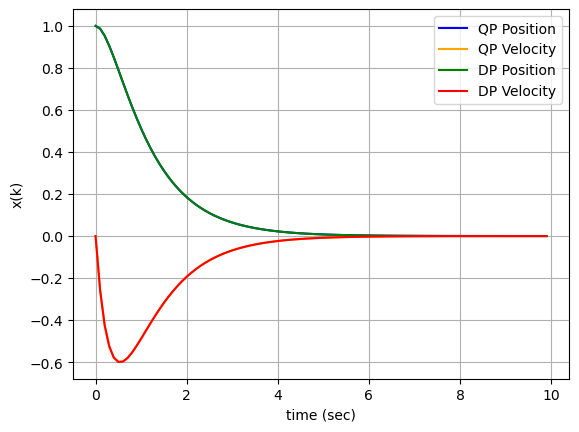

In [14]:
compare_x(thist,xhist_qp,xhist_dp)

รูปที่ 4.8 ผลการเปรียบเทียบแนววิถีสถานะจากวิธี QP และ DP

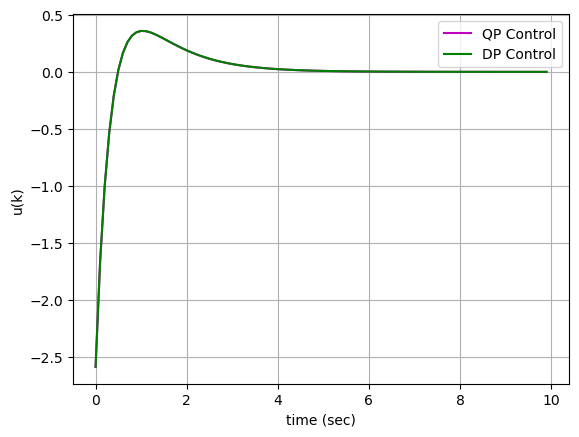

In [15]:
compare_u(thist,uhist_qp.flatten(), uhist_dp.flatten())

รูปที่ 4.9 ผลการเปรียบเทียบแนววิถีตัวควบคุมจากวิธี QP และ DP

ตรวจสอบค่าสมาชิกของ $K_k$ และ $P_k$ เทียบขั้นเวลาได้ผลดังรูปที่ 4.10 และ 4.11 
ซึ่งจะได้ผลเหมือนกับวิธีวนซ้ำริกคาติในบทที่ 3 คือการวนซ้ำเริ่มจากส่วนปลายย้อนกลับไปส่วนต้น 
ดังนั้นในช่วงปลายค่าจะมีการเปลี่ยนแปลง จนเริ่มเข้าสู่ค่าคงที่เมื่อย้อนกลับไปช่วงเวลาหนึ่ง (ประมาณ 3 วินาที) 

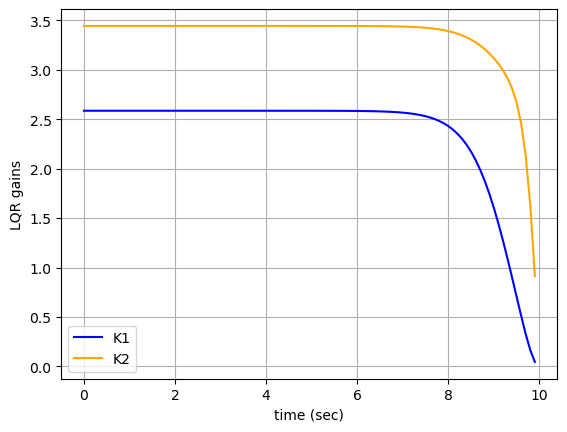

In [16]:
plt.figure()
plt.plot(thist,K[0,0,:],'b')
plt.plot(thist,K[0,1,:],'orange')
plt.legend(['K1','K2'])
plt.xlabel('time (sec)')
plt.ylabel('LQR gains')
plt.grid(True)
plt.show()


รูปที่ 4.10 ค่าสมาชิกของเวกเตอร์ $K_k$ ที่คำนวณย้อนหลัง

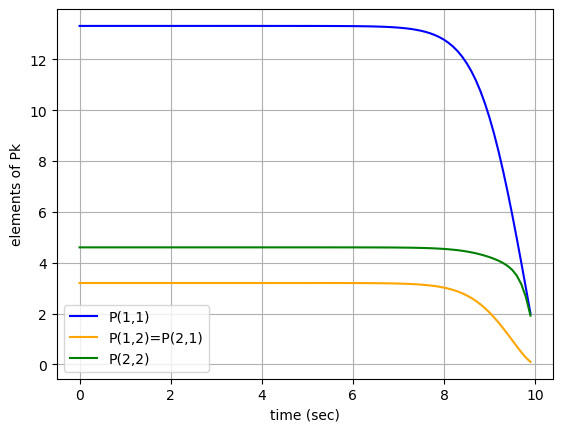

In [17]:
plt.figure()
plt.plot(thist,P[0,0,:-1],'b')
plt.plot(thist,P[0,1,:-1],'orange')
plt.plot(thist,P[1,1,:-1],'g')
plt.legend(['P(1,1)','P(1,2)=P(2,1)','P(2,2)'])
plt.xlabel('time (sec)')
plt.ylabel('elements of Pk')
plt.grid(True)
plt.show()

รูปที่ 4.11 ค่าสมาชิกของเมทริกซ์ $P_k$ ที่คำนวณย้อนหลัง

คำนวณมูลค่าจากทั้งสองวิธีจะได้ค่าประมาณเท่ากัน

In [18]:
J(xhist_qp,uhist_qp).item()

6.658612208961308

In [19]:
J(xhist_dp,uhist_dp).item()

6.658612208961312

สำหรับกรณีแนวนอนอนันต์ ใช้แพ็กเกจ Python Control Systems คำนวณหาเมทริกซ์ $K$ 
ได้โดยวิธี dlqr() เหมือนกับในบทที่ 3 เมื่อเปรียบเทียบกับ $K_k$ เมื่อเข้าสู่ค่าคงที่จะพบว่าแตกต่างกันน้อยมาก

In [21]:
import control as ctl

In [22]:
# Compute infinite-horizon K matrix using Control Systems library
Kinf = ctl.dlqr(A,B,Q,R)
Kinf = Kinf[0]
# Compare to DP method at k = 0
K[:,:,0] - Kinf

array([[-6.72932732e-09, -2.28764208e-09]])

สังเคราะห์เมทริกซ์ $P$ โดยแพ็กเกจนี้โดยวิธี dare() เปรียบเทียบกับ $P_k$ เมื่อคงที่

In [23]:
#Compute infinite-horizon P matrix using Control Systems Library
Pinf = ctl.dare(A,B,Q,R)
Pinf = Pinf[0]
#Compare to DP method at k = 0
P[:,:,0] - Pinf

array([[-2.32084698e-08, -7.88975241e-09],
       [-7.88975196e-09, -2.68212919e-09]])

เราสามารถตรวจสอบหลักการของความเหมาะที่สุดได้จากโปรแกรม โดยเขียนฟังก์ชัน rollout() 
ที่สามารถกำหนดขั้นสถานะเริ่มต้นได้ตามต้องการ กล่าวคือใช้สำหรับหาคำตอบปัญหาย่อยส่วนปลายจากจุดเริ่มต้นที่กำหนดไปยังขั้นสุดท้าย 

In [24]:
# Create a forward rollout function starting at xk
def rollout(k,x):
    xsub = np.zeros((n,N-k))
    xsub[:,[0]] = x
    usub = np.zeros((m,N-k-1))
    for j in range(k,N-1):
        usub[:,[j-k]] = -K[:,:,j]@xsub[:,[j-k]]
        xsub[:,[j-k+1]] = A@xsub[:,[j-k]] + B*usub[:,[j-k]]
    return xsub, usub    

ทดลองหาแนววิถีจากขั้นที่ 50 จนถึงขั้นสุดท้าย

In [25]:
k = 50
xsub, usub = rollout(k,xhist_dp[:,[k]])

เมื่อเปรียบเทียบแนววิถีย่อยนี้กับส่วนปลายของแนววิถีเหมาะที่สุดเดิม จะต้องไม่มีความแตกต่างกัน

In [28]:
norm(xsub - xhist_dp[:,k:])

0.0

In [29]:
norm(usub - uhist_dp[:,k:])

0.0

ในขั้นสุดท้ายต้องการแสดงความสัมพันธ์ระหว่างตัวคูณลากรานจ์จากวิธี QP และเกรเดียนต์ของมูลค่ารายทางจากวิธี DP 
ในส่วนนี้ต้องการฟังก์ชันคำนวนอนุพันธ์อัตโนมัติโดยใช้แพ็กเกจ drake 

In [31]:
from pydrake import forwarddiff

นิยามฟังก์ชันคำนวณมูลค่ารายทางสำหรับกรณีแนวนอนจำกัดและแนวนอนอนันต์ 

In [32]:
# cost-to-go function
def Vinf(x):
    return 0.5*x.T@Pinf@x

def V(x):
    return 0.5*x.T@P[:,:,k]@x

จากการหาคำตอบโดยวิธี QP ด้านบน เราได้คัดแยกตัวคูณลากรานจ์ใส่ในเวกเตอร์ lambdahist_qp พิจารณาค่าจากขั้น k-2

In [30]:
lambdahist_qp[:,k-2]

array([ 0.08494406, -0.01444303])

เปรียบเทียบกับค่าเกรเดียนต์ที่คำนวณจาก forwarddiff ในกรณีแนวนอนจำกัดและแนวนอนอนันต์ 
พบว่ามีค่าใกล้เคียงกันมาก

In [33]:
forwarddiff.gradient(V,xhist_dp[:,k-1])

array([ 0.08494305, -0.01444337])

In [34]:
#Also compare to infinite horizon
forwarddiff.gradient(Vinf,xhist_dp[:,k-1])

array([ 0.0849483 , -0.01444159])

**หมายเหตุ :** การระบุหมายเลขขั้นในเนื้อหากับในโปรแกรมอาจมีความแตกต่างกัน 
เพราะในภาษาไพทอนตัวชี้เริ่มจาก 0 แต่ในเนื้อหาเรามักเริ่มขั้นแรกจาก 1 ดังนั้นการเขียนโค้ดอาจต้องระมัดระวังในส่วนนี้ 
มิฉะนั้นคำตอบจากโปรแกรมอาจคลาดเคลื่อนจากความเป็นจริง 
(ซึ่งบางครั้งค่าคลาดเคลื่อนมีค่าน้อยเพราะข้อมูลอาจเปลี่ยนแปลงไม่มากระหว่างขั้นที่ต่อเนื่องกัน)

ทดลองคำนวณอนุพันธ์ของมูลค่าเทียบกับสถานะโดยวิธีประมาณค่าแบบผลต่างจำกัด (finite difference) ก็จะได้ค่าที่ใกล้เคียงกัน

In [36]:
delta = 1e-6
x1p, u1p = rollout(k-1,xhist_dp[:,[k-1]]+np.array([delta,0]).reshape(2,1))
x2p, u2p = rollout(k-1,xhist_dp[:,[k-1]]+np.array([0,delta]).reshape(2,1))
lambda_fd = np.array([J(x1p,u1p) - J(xhist_dp[:,k-1:],uhist_dp[:,k-1:]),
             J(x2p,u2p) - J(xhist_dp[:,k-1:],uhist_dp[:,k-1:])])/delta
lambda_fd.flatten()

array([ 0.08495071, -0.01444073])

### 4.4.2 การควบคุมแบบทำนายโมเดล

ในเนื้อหาการควบคุมเหมาะที่สุดที่ผ่านมาเราได้ใช้ตัวควบคุม LQR เป็นตัวอย่างมาตลอด 
โดยเป็นตัวควบคุมพื้นฐานที่ช่วยให้เข้าใจหลักการของวิธีการต่างๆ ได้ดีขึ้น 
เป็นตัวควบคุมเชิงเส้นที่ใช้งานได้ดีในทางปฎิบัติแม้กับระบบไม่เป็นเชิงเส้น หากสามารถประมาณค่าเป็นระบบเชิงเส้นบริเวณจุดทำงาน 

อย่างไรก็ตาม ข้อจำกัดของตัวควบคุม LQR จะเด่นชัดขึ้นเมื่อมีเงื่อนไขบังคับอสมการ เช่นการจำกัดค่าสถานะและ/หรือเอาต์พุตควบคุม 
ซึ่งโดยวิธี LQR มิได้ออกแบบมาเพื่อจัดการกับผลกระทบนี้ เราสามารถเข้าใจผลจากเงื่อนไขบังคับอสมการได้ดีขึ้นในมุมมองของ DP

**หมายเหตุ :** เช่นเดียวกับในหัวข้อก่อนหน้า ในเนื้อหาเกี่ยวกับการควบคุมเหมาะที่สุดจะพิจารณาเฉพาะมูลค่าเหมาะที่สุดเสมอ 
ดังนั้นจะละทิ้งตัวยก $^*$ เพื่อให้สมการอ่านง่ายขึ้น

โดยวิธีการ DP เมื่อกำหนดฟังก์ชันมูลค่าขั้นของปัญหา LQR
$$
g(x_k,u_k) = \frac{1}{2}x_k^TQx_k + \frac{1}{2}u_k^TRu_k \tag{4.21}
$$

หากเราทราบฟังก์ชันมูลค่ารายทาง $J(x)$ ทำให้สา่มารถหาคำตอบ $u$ โดยแก้ปัญหาขั้นเดี่ยว
$$
\begin{align*}
u_k &= arg \; \underset{u}{min} \left[g(x_k,u) + J_{k+1}(f(x_k,u))\right] \\
&= arg \; \underset{u}{min} \left[\frac{1}{2}u^TRu + (Ax_k+Bu)^TP_{k+1}(Ax_k+Bu)\right] \tag{4.22}
\end{align*} 
$$
โดยละทิ้งพจน์ $\frac{1}{2}x_k^TQx_k$ ที่ไม่เป็นฟังก์ชันของ $u_k$ เราอาจเพิ่มเงื่อนไขบังคับเพื่อจำกัดค่า $u$ เข้า ในปัญหาขั้นเดียวนี้ แต่ย่อมมีผลทำให้คำตอบคลาดเคลื่อนไป เพราะมูลค่ารายทาง $J_{k+1}(f(x_k,u))$ ถูกคำนวณโดยไม่มีเงื่อนไขบังคับ ดังนั้นระบบนี้จะทำงานได้ไม่ดีอย่างแน่นอน

วิธีแก้คือเพิ่มจำนวนขั้นให้กับปัญหา
$$
\underset{\substack{x_{1:H} \\ u_{1:H-1}}}{min}\;\left[ \sum_{k=1}^{H-1}\left(\frac{1}{2}x_k^TQx_k 
+ \frac{1}{2}u_k^TRu_k\right) + x_H^TP_Hx_H \right] \tag{4.23}
$$
ก่อนถึงมูลค่ารายทาง $x_H^TP_Hx_H$ โดย $H \ll N$ คือจำนวนแนวนอน (horizon) วิธีการนี้เรียกว่า *การควบคุมแบบทำนายโมเดล (MPC: model predictive control)* หรือ *การควบคุมถอยห่างแนวนอน (RHC: receding horizon control)* ในหนังสือนี้จะใช้ชื่อแรกโดยเรียกตัวย่อ MPC สังเกตว่าหากไม่มีเงื่อนไขบังคับเพิ่มเติม การควบคุุม MPC จะให้ผลเหมือนกับ LQR โดยไม่ขึ้นกับค่า $H$

แนวคิดของ MPC ในการลดผลกระทบจากการจำกัดค่าตัวแปรคือ หาค่าเหมาะที่สุดแบบมีเงื่อนไขบังคับเป็นจำนวน $H$ ขั้น เพื่อทำให้สถานะเข้าใกล้ค่าอ้างอิงเพียงพอจนเงื่อนไขบังคับไม่มีผล ดังนั้นมูลค่ารายทางของ LQR จึงเป็นค่าที่ถูกต้องสำหรับในอนาคต หลักการนี้ครอบคลุมไปถึงกรณีที่มูลค่ารายทาง $J(x)$ ได้จากการประมาณค่า ซึ่งความแม่นยำจะมีผลต่อสมรรถนะระบบ โดยยิ่งค่าที่ประมาณได้ $\hat{J}(x)$ ใกล้เคียงกับค่าจริงมากขึ้น ก็จะสามารถใช้ค่า $H$ ที่สั้นลงได้

เนื้อหาในหัวข้อนี้จะพิจารณาปัญหา MPC แบบคอนเวกซ์เท่านั้น ตามนิยามฟังก์ชันคอนเวกซ์ในภาคผนวก A ทำให้สามารถหาคำตอบได้แบบออนไลน์โดยวิธี QP


**ตัวอย่าง 4.3** ในตัวอย่างนี้จะเปรียบเทียบการใช้ตัวควบคุม LQR กับ MPC กับโดรนที่นิยมเรียกว่า 
ควอดโรเตอร์ (quadrotor) หรือควอดคอปเตอร์ (quadcopter) ซึ่งโครงสร้างประกอบด้วยตัวขับ 4 ใบพัด
แต่ในเบื้องต้นเพื่อให้เข้าใจง่ายขึ้นจะพิจารณาโดรนที่มี 2 ใบพัดและเคลื่อนที่ในระนาบ 2 มิติ ดังแสดงในรูปที่ 4.12 บรรยายพลวัตไม่เป็นเชิงเส้นได้ดังนี้

$$
\begin{align*}
m\ddot{x} &= -(u_1+u_2)sin(\theta) \\
m\ddot{y} &= (u_1+u_2)cos(\theta) - mg \\
J\ddot{\theta} &= \frac{l}{2}(u_2 - u_1) \tag{4.24}

\end{align*}
$$


<img src="https://raw.githubusercontent.com/dewdotninja/ocrl/refs/heads/main/doc/figs/ch4_drone2d.png" width=800 />

รูปที่ 4.12 โดรน 2 ใบพัดในระนาบ 2 มิติ

เมื่อประมาณค่าเชิงเส้นรอบตำแหน่งที่ลอยนิ่ง (hover) จะได้เป็น

$$
u_1 = u_2 = \frac{1}{2}mg \tag{4.25}
$$
$$
\begin{align*}
\Delta \ddot{x} &\approx -g\Delta \theta \\
\Delta \ddot{y} &\approx \frac{1}{m}(\Delta u_1 + \Delta u_2) \\
\Delta \ddot{\theta} &\approx \frac{l}{2J}(\Delta u_2 - \Delta u_1) \tag{4.26}
\end{align*}
$$

เขียนเป็นสมการเมทริกซ์ได้ดังนี้
$$
\left[\begin{array}{c}
\Delta \dot{x} \\
\Delta \dot{y} \\
\Delta \dot{\theta} \\
\Delta \ddot{x} \\
\Delta \ddot{y} \\
\Delta \ddot{\theta} \\
\end{array}\right] = 
\left[ \begin{array}{ccccccc} 
0 & 0 & 0 &| &1 &0 &0 \\
0 & 0 & 0 &| &0 &1 &0 \\
0 & 0 & 0 &| &0 &0 &1 \\
- & - & - &- &- &- &- \\
0 & 0 & -g &| &0 &0 &0 \\
0 & 0 & 0 &| &0 & 0 &0 \\
0 & 0 & 0 & | &0 &0 &0
\end{array}\right]
\left[\begin{array}{c}
\Delta x \\
\Delta y \\
\Delta \theta \\
\Delta \dot{x} \\
\Delta \dot{y} \\
\Delta \dot{\theta} \\
\end{array}\right] +  
\left[\begin{array}{cc} 
0 & 0 \\
0 & 0 \\
0 & 0 \\
- & - \\
0 & 0 \\
\frac{1}{m} & \frac{1}{m} \\
\frac{-l}{2J} & \frac{l}{2J}
\end{array}\right]
\left[\begin{array}{cc}
\Delta u_1 \\
\Delta u_2
\end{array}\right] \tag{4.27}
$$

นิยามฟังก์ชันมูลค่า MPC
$$
J = \sum_{k=1}^{H-1} \;\left[ \frac{1}{2}(x_k - x_{ref})^TQ(x_k - x_{ref}) 
+ \frac{1}{2} \Delta u_k^TRu_k + \frac{1}{2}(x_H - x_{ref})^TP_H(x_H - x_{ref})\right] \tag{4.28}
$$


## 4.x การโปรแกรมพลวัตในระบบเวลาต่อนื่อง

แม้ว่าหนังสือนี้จะเน้นระบบดีสครีตที่สามารถนำไปประยุกต์ใช้ได้ในทางปฎิบัติ 
แต่เพื่อความสมบูรณ์ของเนื้อหาในหัวข้อนี้จะกล่าวถึงการโปรแกรมพลวัตในระบบเวลาต่อเนื่องโดยสังเขป 

### 4.x.1 สมการแฮมิลตัน-จาโคบิ-เบลแมน

โดยแท้จริงแล้วสมการ (4.6),(4.7) เป็นมากกว่าอัลกอริทึม แต่ยังเป็นเงื่อนไขเพียงพอสำหรับความเหมาะที่สุดด้วย 
ถ้าเราสามารถหา $J^*$ และ $u^*$ ที่ทำให้ (4.6),(4.7) เป็นจริง $u^*$ นั้นต้องเป็นตัวควบคุมเหมาะที่สุด 

สำหรับระบบเวลาต่อเนื่อง เมื่อพิจารณามูลค่าการบวก (additive cost) 
$$
J = \int_0^Tl_c(x(t),u(t)dt) \tag{4.xx}
$$
ภายใต้เงื่อนไขพลวัต
$$
\dot{x} = f_c(x,u) \tag{4.xx}
$$
เงื่อนไขเพียงพอจะเป็นดังนี้
$$
0 = \underset{u}{min} \;\left[l_c(x,u)+\frac{\partial J^*}{\partial x}f_c(x,u)\right] \tag{4.xx}
$$
$$
u^*(x) = arg \; \underset{u}{min}\;\left[l_c(x,u)+\frac{\partial J^*}{\partial x}f_c(x,u)\right] \tag{4.xx}
$$

(4.xx) เรียกว่าสมการฮามิลตัน-จาโคบิ-เบลแมน (Hamilton-Jacobi-Bellman ย่อว่า HJB) [1,5] 

การแสดงที่มาของ (4.xx) อย่างง่ายคืออนุพัทธ์ในระบบดีสครีตและให้ลิมิตคาบเวลาสู่ศูนย์ จากการประมาณค่าออยเลอร์ เมื่อกำหนดคาบเวลา $h$
$$
x_{k+1} = x_k + hf_c(x_k,u_k) \tag{4.xx}
$$
ในทำนองเดียวกัน ฟังก์ชันมูลค่าในระบบดีสครีตสามารถประมาณค่าได้จาก
$$
l_d(x,u) = hl_c(x,u) \tag{4.xx}
$$
จากสมการ (4.6) เขียนใหม่อีกครั้งโดยนิยามมูลค่าขั้นเป็น $l_d(x_k,u_k)$
$$
J^*(x_k) = \underset{u}{min} \; \left[l_d(x_k,u_k) + J^*(f_d(x_k,u_k))\right] \tag{4.xx}
$$
เมื่อแทนค่าการประมาณค่านี้ในพจน์ด้านขวา จะได้เป็น
$$
J^*(x_k) = \underset{u}{min} \; \left[hl_c(x_k,u_k) + J^*(x+hf_c(x_k,u_k))\right] \tag{4.xx}
$$
เพื่อเข้าใจได้ง่ายง่ายสมมุติว่าพลวัตไม่เป็นฟังก์ชันของเวลา เราสามารถประมาณค่าได้เป็น
$$
J^*(x_k) = \underset{u}{min} \; \left[hl_c(x_k,u_k) + J^*(x_k) 
+\frac{\partial J}{\partial x}f_c(x_k,u_k)\right] \tag{4.xx}
$$
เนื่องจากพจน์ $J^*(x_k)$ ไม่ขึ้นกับ $u$ สามารถนำออกนอก $\underset{u}{min}$ ได้ จะเห็นว่าพจน์ $J^*(x_k)$ ด้านซ้ายและขวาหักล้างกัน หลังจากนั้นขจัดสัมประสิทธิ์ $h$ ด้านขวาออก เหลือเป็นสมการ HJB (4.xx)

## 4.x สรุปท้ายบท

เนื้อหาในบทนี้่เป็นการศึกษาการโปรแกรมพลวัตแบบเชิงกำหนดและแม่นตรง ซึ่งเป็นพื้นฐานของ DP 
ก่อนจะขยายไปยังปัญหาสโทแคสติกและแบบที่มีการประมาณค่าฟังก์ชัน เราได้อธิบายถึงหลักการของความเหมาะที่สุดที่เป็นรากฐานของวิธี DP 
ในการสร้างอัลกอริทึมคำนวณมูลค่ารายทางจากปัญหาย่อยส่วนปลายย้อนกลับมายังค่าเริ่มต้น 
เมื่อได้มูลค่ารายทางเหมาะที่สุดก็ทำให้สามารถหาตัวควบคุมเหมาะที่สุดได้ โดยจะเห็นว่าวิธี DP ทำให้เราได้คำตอบเหมาะที่สุดแบบวงกว้าง 
(global optimum) อย่างไรก็ตามในความเป็นจริงจะใช้ได้เพียงสำหรับระบบอย่างง่ายที่มีมิติไม่สูงและฟังก์ชันไม่ซับซ้อน 
ตัวอย่างเช่นในปัญหา LQR พลวัตเป็นเชิงเส้น
ฟังก์ชันมูลค่ารายทางจะเป็นกำลังสองอยู่เสมอทำให้หาคำตอบได้แม้เพิ่มขั้นเวลาแนวนอน 
แต่ในกรณีปัญหาไม่เป็นเชิงเส้นทั่วไปที่ไม่สามารถหาคำตอบเชิงวิเคราะห์ หรืออาจหาได้แต่ปัญหาการหาค่าเหมาะที่สุดไม่เป็นคอนเวกซ์ 
เหล่านี้ทำให้ความซับซ้อนของปัญหา DP แบบแม่นตรงเพิ่มขึ้นตามมิติของสถานะ ตามที่เบลแมนนิยามว่าเป็นคำสาป 

แม้ว่าปัจจุบันสมรรถนะคอมพิวเตอร์จะสูงกว่าในอดีตอย่างมากมาย แต่โจทย์ปัญหาในสาขาต่างๆ ก็เพิ่มความท้าทายในแง่ของข้อมูลที่มากขึ้น 
และความต้องการของมนุษย์ที่ซับซ้อนขึ้น นอกจากนั้นระบบควบคุมส่วนใหญ่มักต้องทำงานบนระบบฝังตัวที่มีสมรรถนะและทรัพยากรจำกัด 
โดยเหตุผลนี้เอง วิธี DP ที่ใช้การประมาณค่าฟังก์ชันมูลค่าหรือฟังก์ชัน Q จึงได้รับความสนใจอย่างมาก โดยเฉพาะด้าน RL สมัยใหม่ 

นอกจากนั้น วิธี DP มีจุดเด่นอีกประการหนึ่งคือสามารถวางนัยทั่วไปสู่ปัญหาสโทแคสติกได้โดยตรง โดยแทนค่าเชิงกำหนดด้วยค่าคาดหมาย 
(expected values) ซึ่งบางวิธีการเช่นหลักการของพอนเทรียกินไม่สามารถทำได้ 





## บรรณานุกรม

1. R.E. Bellman. Dynamic Programming. Princeton University Press. 1957.

2. D.P. Bertsekas. Reinforcement Learning and Optimal Control. MIT Press. 2019.

3. D.P. Bertsekas. [A Course in Reinforcement Learning, 2nd ed](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://web.mit.edu/dimitrib/www/RLCOURSECOMPLETE%202ndEDITION.pdf). Athena Scientific. 2025. 

4. Z. Manchester et.al. [16-745 Optimal Control & Reinforcement Learning, 
Course materials](https://optimalcontrol.ri.cmu.edu/#learning-resources), Carnegie Mellon University. 2024,2025.

5. R. Tedrake. [Underactuated Robotics: Algorithms for Walking, Running, Swimming, Flying, and Manipulation (Course Notes for MIT 6.832)](https://underactuated.csail.mit.edu). 2023. 

## โจทย์ปัญหา

4-1 วิธี DP ได้ถูกประยุกต์ใช้ในสาขา OR ในโจทย์หลายรูปแบบ เช่นการจัดกำหนดการ (scheduling) 
พิจารณาโจทย์อย่างง่ายที่มีการดำเนินการ 4 งานคือ A, B, C, D โดยมีเงื่อนไขบังคับดังนี้ A จะต้องถูกดำเนินการก่อน C 
และ B ต้องถูกดำเนินการก่อน D ตัวอย่างเช่นลำดับ ABCD, ACBD ยอมรับได้ แต่ BCAD ถือว่าผิดเงื่อนไข เป็นต้น 
สร้างแผนภาพต้นไม้จากสถานะเริ่มต้นไปยังสถานะสุดท้าย  

4-2 จากโจทย์ข้อ 4-1 กำหนดค่าใช้จ่ายให้กับแต่ละกิ่งของต้นไม้ และค่าใช้่จ่ายขั้นสุดท้าย โดยเลือกค่าใดๆ ตามต้องการ 
หลังจากนั้นใช้วิธี DP เพื่อหาลำดับการจัดการที่มีค่าใช้จ่ายต่ำสุด  

**หมายเหตุ :** รายละเอียดของโจทย์ข้อ 4-1, 4-2 อ่านเพิ่มเติมได้จาก [3]

4-3 ในบทที่ 2-3 เราได้อธิบายตัวคูณลากรานจ์ที่แปลงเงื่อนไขบังคับเป็นพจน์ในฟังก์ชันมูลค่า หากมีผู้กล่าวว่า 
เมื่อจัดรูปเป็นปัญหา DP ตัวคูณลากรานจ์คือเกรเดียนต์ของฟังก์ชันมูลค่ารายทาง ท่านมีความเห็นสนับสนุนหรือโต้แย้งคำกล่าวนี้อย่างไร? 



<div align="center">
<img src="https://raw.githubusercontent.com/dewdotninja/sharing-github/refs/heads/master/dewninja_logo50.jpg" alt="dewninja"/>
</div>
<div align="center">dew.ninja 2025</div>